## **Group Members**  
Amelia Harn  
Gitika Saravanan  
Anika Rai  

## **Introduction**

As the global economy becomes increasingly dependent on digital transactions, the threat of credit card fraud continues to increase. Financial institutions face immense pressure to detect and prevent fraudulent activity in real time. Nevertheless, this is often with limited information and under significant time constraints. In this project, we investigate patterns within a large transactional dataset to understand what characteristics are most predictive of fraudulent behavior. Some of these inlcude merchant type, transaction amount, customer demographics, and geographic indicators. By examining these features, we hope uncover insights that could enhance fraud detection systems.

Our central research question is: To what extent can we predict the likelihood of fraud based on transaction-level features? We approach this question through a combination of statistical inference and supervised machine learning. First, we conduct a rigorous exploratory data analysis, using hypothesis testing and visualization to identify significant trends. Then, we implement different types of classification models to evaluate the predictive power of multiple different attributes. This work is important not only for improving fraud reduction strategies but also for contributing to a broader understanding of how data driven methods can tackle real world challenges.


## **Data Curation**

##### ***Import necessary libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### ***Import and view the dataset as a dataframe***

In [2]:
# load csv file into cct_data dataframe
cct_data = pd.read_csv('credit_card_transactions.csv')
# dsplay number of rows and columns
print(f"(# of rows, # of columns): {cct_data.shape}")
# display data
pd.set_option('display.max_columns', None)
display(cct_data)

(# of rows, # of columns): (1296675, 24)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


##### ***Parse the dataset***

In [3]:
# dataset types before processing
print(f"Data types before processing:\n\n{cct_data.dtypes}")

Data types before processing:

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object


In [4]:
# convert date columns
cct_data['trans_date_trans_time'] = pd.to_datetime(cct_data['trans_date_trans_time'], errors='coerce')
cct_data['dob'] = pd.to_datetime(cct_data['dob'], errors='coerce')

In [5]:
# convert below columns into categories
categorical_cols = ['gender', 'category', 'state', 'job', 'is_fraud']
for col in categorical_cols:
    cct_data[col] = cct_data[col].astype('category')

In [6]:
# clean up zip codes and store them as strings
cct_data['zip'] = cct_data['zip'].astype(str).str.zfill(5)
cct_data['merch_zipcode'] = cct_data['merch_zipcode'].fillna(0).astype(int).astype(str).str.zfill(5)

In [7]:
# convert ids into strings
cct_data['trans_num'] = cct_data['trans_num'].astype(str)
cct_data['cc_num'] = cct_data['cc_num'].astype(str)

In [8]:
# create new columns for easy ML analysis in the future
cct_data['age'] = (cct_data['trans_date_trans_time'] - cct_data['dob']).dt.days // 365
cct_data['trans_hour'] = cct_data['trans_date_trans_time'].dt.hour
cct_data['trans_dayofweek'] = cct_data['trans_date_trans_time'].dt.dayofweek

In [9]:
# drop unneeded columns
drop_cols = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time']
cct_data = cct_data.drop(columns=drop_cols)

In [10]:
# display info
print(f"Data types after processing:\n\n{cct_data.dtypes}")
print(f"\n(# of rows, # of columns): {cct_data.shape}")
display(cct_data)

Data types after processing:

trans_date_trans_time    datetime64[ns]
merchant                         object
category                       category
amt                             float64
gender                         category
city                             object
state                          category
zip                              object
lat                             float64
long                            float64
city_pop                          int64
job                            category
dob                      datetime64[ns]
merch_lat                       float64
merch_long                      float64
is_fraud                       category
merch_zipcode                    object
age                               int64
trans_hour                        int32
trans_dayofweek                   int32
dtype: object

(# of rows, # of columns): (1296675, 20)


,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,merch_zipcode,age,trans_hour,trans_dayofweek
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,28705,30,0,1
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,00000,40,0,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,83236,56,0,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,00000,52,0,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,22844,32,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,00000,58,12,6
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,22630,40,12,6
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,88351,52,12,6
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,69367,39,12,6


## **Exploratory Data Analysis**

QUESTION #1: Are some merchant categories disproportionately fraudulent?  
Statistical method: Chi‑square test of independence (categorical × categorical)     
Plot: Horizontal bar plot of fraud rate by category (top N categories)

In [11]:
cross_tab=pd.crosstab(cct_data['category'], cct_data['is_fraud'])
display(cross_tab)


is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


In [12]:
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}\nExpected Frequencies:\n {expected}")

Chi-Square Statistic: 6486.003269983207
P-value: 0.0
Degrees of Freedom: 13
Expected Frequencies:
 [[ 93469.78569495    544.21430505]
 [ 90931.56412285    529.43587715]
 [130896.87190005    762.12809995]
 [ 45188.89420094    263.10579906]
 [122922.30267569    715.69732431]
 [ 85381.87637689    497.12362311]
 [122402.33014055    712.66985945]
 [112380.67975013    654.32024987]
 [ 62920.65359708    366.34640292]
 [ 79193.90494534    461.09505466]
 [ 90232.63354503    525.36645497]
 [ 96978.35754295    564.64245705]
 [115996.62642374    675.37357626]
 [ 40272.51908381    234.48091619]]


After conducting the Chi-Square Test, we found p \<0.001. Since the p-value is less than our chosen significance level, we can reject the null hypothesis. Shown below are the 10 merchant categories with the highest number of fraudulent transactions.

/tmp/ipython-input-13-3906514547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = cct_data[cct_data['is_fraud'] == 1].groupby('category').size()


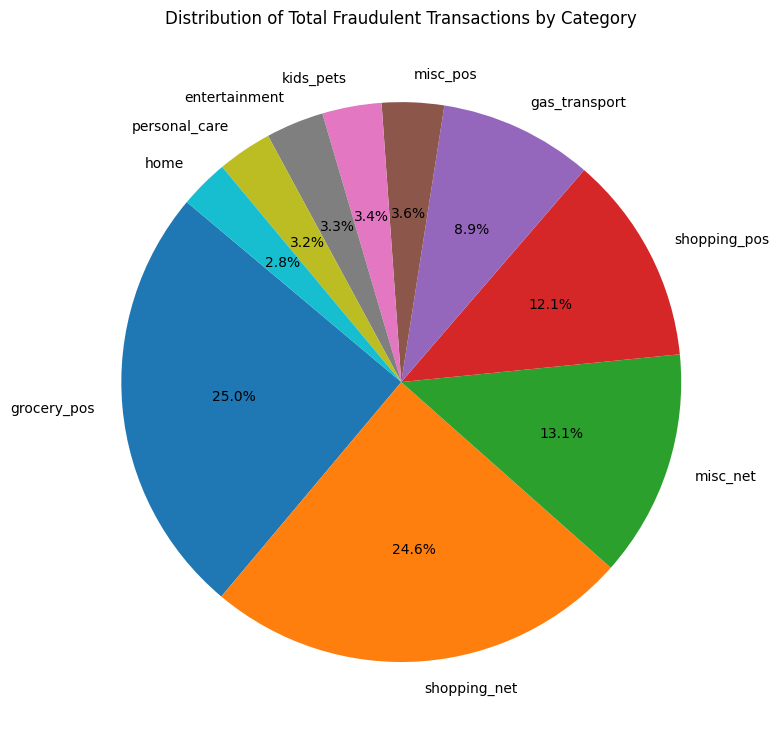

In [13]:
fraud_counts = cct_data[cct_data['is_fraud'] == 1].groupby('category').size()
fraud_counts = fraud_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Fraudulent Transactions by Category')
plt.tight_layout()
plt.show()

Next, we can take a look at the standardized residuals of the expected values. The expected values array from above are the counts of expected fraudulent and non-fraudulent transactions if fraud were equally likely across all merchants (i.e. if there was no association between merchant category and presence of fraud).

In [14]:
observed = cross_tab.values
residuals = (observed - expected) / (expected ** 0.5)

print("\nStandardized residuals:\n",
      pd.DataFrame(residuals,
                   index=cross_tab.index,
                   columns=cross_tab.columns))


Standardized residuals:
 is_fraud               0          1
category                           
entertainment   1.017944 -13.340576
food_dining     1.254975 -16.446959
gas_transport   0.398368  -5.220771
grocery_net     0.607337  -7.959404
grocery_pos    -2.930104  38.400221
health_fitness  1.246138 -16.331146
home            1.471072 -19.279002
kids_pets       1.238903 -16.236332
misc_net       -2.187266  28.665021
misc_pos        0.750122  -9.830663
personal_care   1.016575 -13.322636
shopping_net   -3.687565  48.327059
shopping_pos   -0.492175   6.450159
travel          0.590397  -7.737393


How do we interpret these results? If the residual value is greater than 2, then the observed frequency is greater than the expected frequency. If the residual value is less than -2, then the observed frequency is less than the expected frequency. Thus, we can take special interest in shopping_net, grocery_pos, and misc_net as the most fraud-prone categories.

QUESTION #2: Do men and women spend different amounts on average?  
Statistical method: Welch’s two‑sample t‑test and non‑parametric Mann‑Whitney test

Welch's t-test p-value: 0.24105
Mann-Whitney U p-value: 0.00000


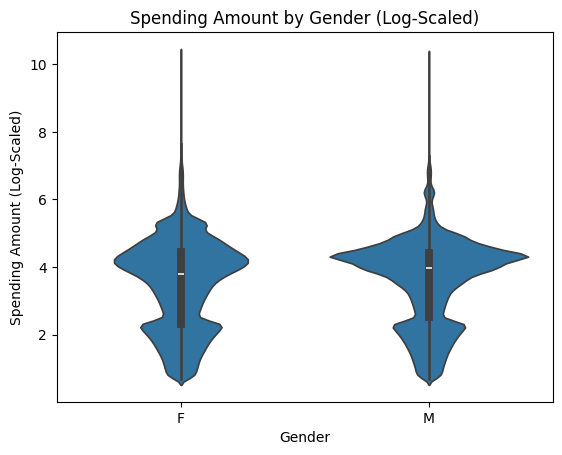

In [15]:
from scipy.stats import ttest_ind, mannwhitneyu

# drop nan values in gender and amt
df_gender = cct_data[['gender', 'amt']].dropna()

# log-transform to stabilize any variance
df_gender['log_amt'] = np.log1p(df_gender['amt'])

# run a welch's two sample t-test (which assumes unequal variances)
male_amt = df_gender[df_gender['gender'] == 'M']['amt']
female_amt = df_gender[df_gender['gender'] == 'F']['amt']
t_stat, t_pval = ttest_ind(male_amt, female_amt, equal_var=False)

# run a mann-whitney u test
u_stat, u_pval = mannwhitneyu(male_amt, female_amt, alternative='two-sided')

print(f"Welch's t-test p-value: {t_pval:.5f}")
print(f"Mann-Whitney U p-value: {u_pval:.5f}")

# plot violin plots tests
sns.violinplot(data=df_gender, x='gender', y='log_amt')
plt.title("Spending Amount by Gender (Log-Scaled)")
plt.ylabel("Spending Amount (Log-Scaled)")
plt.xlabel("Gender")
plt.show()


The analysis comparing spending amounts between men and women yields different results depending on the statistical test used. Welch’s two-sample t-test, which assumes unequal variances and approximately normal distributions, returned a p-value of 0.241 This suggests that there is no statistical significantly difference in the average amount spent by gender. However, the Mann-Whitney U test gave a p-value near 0, which indicates a significant difference in the distributions of spending between men and women. This discrepancy shows the importance of test selection. Though the t-test focuses solely on differences in means under specific assumptions, the Mann-Whitney test is better suited for non-normal and skewed distributions. These are very common characteristics in financial transaction data. The violin plot supports this, showing that women tend to have a wider range of spending amounts with a heavier upper tail. On the other hand, men's spending is more concentrated around the median. The Mann-Whitney result is therefore more reliable, which suggests that men and women do spend differently even though their averages appear similar.









QUESTION #3: How does amount relate to city population?  
Statistical method: Spearman or Pearson correlation + a p‑value test  
Plot: 2D histogram heat map (with log_scale=True) using sns.histplot()

Pearson correlation: 0.0058, p-value: 0.00000
Spearman correlation: -0.0236, p-value: 0.00000


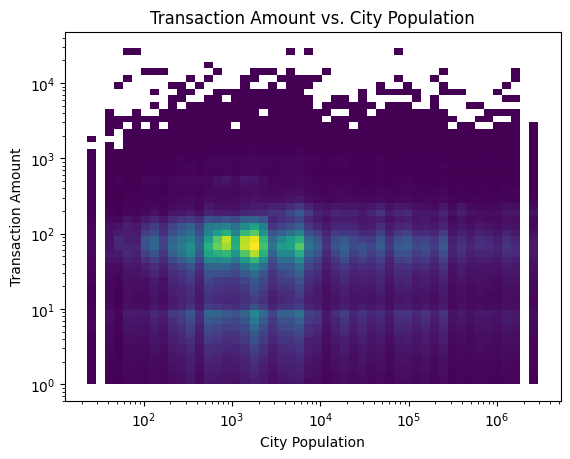

In [16]:
from scipy.stats import spearmanr, pearsonr

# drop nan values in city population and amt
df_city = cct_data[['city_pop', 'amt']].dropna()

# log-transform
df_city['log_amt'] = np.log1p(df_city['amt'])
df_city['log_city_pop'] = np.log1p(df_city['city_pop'])

# run a pearson correlation
pearson_corr, pearson_pval = pearsonr(df_city['city_pop'], df_city['amt'])

# run a spearman correlation
spearman_corr, spearman_pval = spearmanr(df_city['city_pop'], df_city['amt'])

print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_pval:.5f}")
print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_pval:.5f}")

# plot 2D histogram
sns.histplot(data=df_city, x='city_pop', y='amt', bins=50, log_scale=True, cmap="viridis")
plt.title("Transaction Amount vs. City Population")
plt.xlabel("City Population")
plt.ylabel("Transaction Amount")
plt.show()


The analysis is exploring the relationship between transaction amount and city population. It reveals no meaningful correlation regardless of the statistically significant p-values. The pearson correlation coefficient is 0.0058, which means there is very little linear relationship between the two variables. The Spearman correlation coefficient is -0.0236, meaning there is very little monotonic association too. Both tests have p-values close to zero but this significance is probably due to the large size of the dataset rather than any actual statistical significance. The histogram supports this conclusion because it shows no clear trend linking the spending amount and the city population. The most dense activity happens in the middle of the range for both variables but there is no increase or decrease in said activity. Therefore, thought the results are statistically significant, transaction amount and city population are generally uncorrelated in this dataset.











QUESTION #4: (Bonus question) How does average transaction amount vary across different age groups?  
Statistical method: One-way ANOVA comparing means across age bins.  
Plot: Box plot of transaction amount across age bins (log-scaled, labeled)

One-way ANOVA p-value: 0.00000


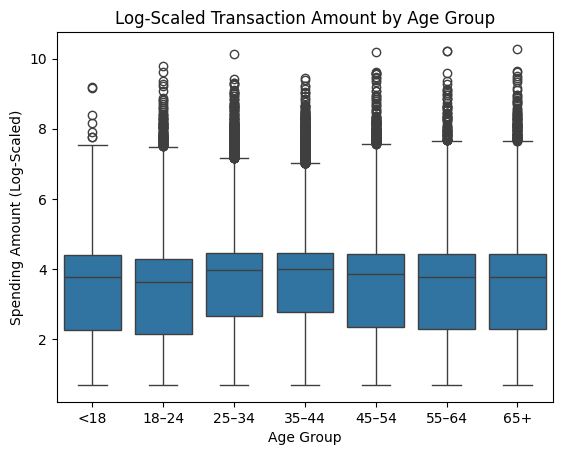

In [17]:
from scipy.stats import f_oneway

# drop unneeded columns (age and amount)
df_age = cct_data[['age', 'amt']].dropna()

# make bins for age
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df_age['age_group'] = pd.cut(df_age['age'], bins=bins, labels=labels, right=False)

# log transform the transaction amount
df_age['log_amt'] = np.log1p(df_age['amt'])

# group the spending amounts by age
grouped_amts = df_age.groupby('age_group', observed=True)['amt'].apply(list)

# run a one-way ANOVA
anova_stat, anova_pval = f_oneway(*grouped_amts)
print(f"One-way ANOVA p-value: {anova_pval:.5f}")

# make a box plot
sns.boxplot(data=df_age, x='age_group', y='log_amt')
plt.title("Log-Scaled Transaction Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Amount (Log-Scaled)")
plt.show()


This analysis shows that there is a statistically significant difference in the average transcation amount across age groups. The p-value of the one way ANOVA test of 0.00000 shows that we can confidently reject the hypothesis that all age groups spend the same amount on average. The box plot (which is log scaled) shows that the overall shape of spending distributions is similar across different ages but certain groups (25-44) show a slightly higher median spending and more larger outliers. This suggests that age does influence spending behavior and middle-aged customers potentially have larger transactions on average compared to younger or older customers.



## **Machine Learning Analysis**

Our objective in this machine learning analysis is to evaluate whether transaction-level features (like merchant category, amount, customer demographics, and time data) can  predict whether a transaction is fraudulent (is_fraud). To do this, we apply supervised machine learning classification algorithms and compare the performance of two models: Logistic Regression, a linear baseline, and Naive Bayes, a fast probabilistic classifier that assumes feature independence. This comparison allows us to explore both the trade-offs and the potential of simple models when applied to imbalanced and real-world datasets like fraud detection.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# drop rows with any missing data
df_ml = cct_data.dropna(subset=['is_fraud', 'amt', 'category', 'gender', 'age'])

# targets and features
X = df_ml.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob'])
y = df_ml['is_fraud'].astype(int)

# feature types
categorical_features = X.select_dtypes(include='category').columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


Logistic Regression

In [19]:
logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_logreg))


Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    257834
           1       0.04      0.80      0.08      1501

    accuracy                           0.89    259335
   macro avg       0.52      0.84      0.51    259335
weighted avg       0.99      0.89      0.94    259335

ROC AUC Score: 0.92666870751586


Logistic Regression - Confusion Matrix

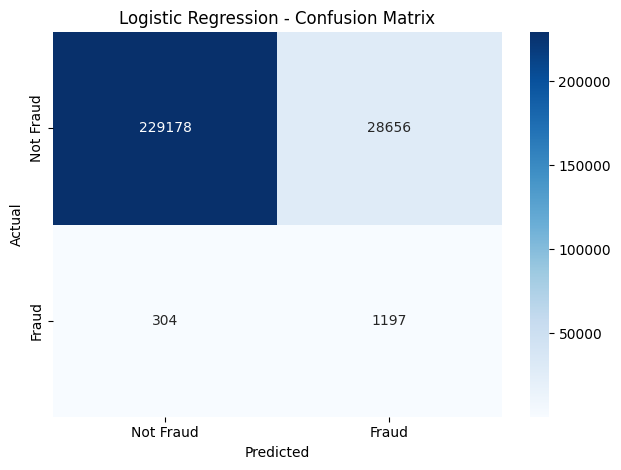

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion(y_test, y_pred_logreg, "Logistic Regression - Confusion Matrix")


Logistic Regression - ROC Curve

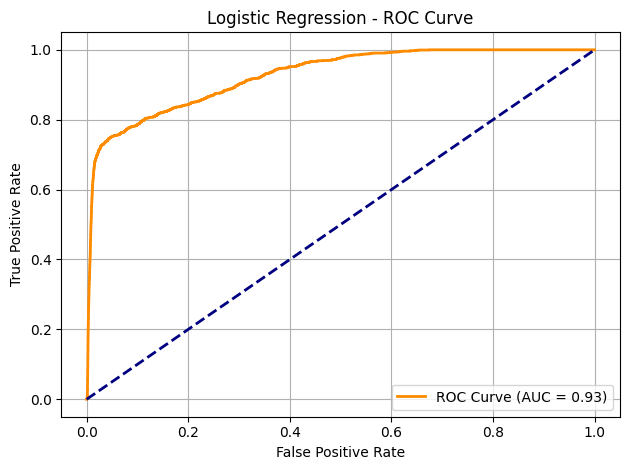

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


The Logistic Regression model performs well overall, achieving an accuracy of 89% and an ROC AUC score of 0.93. This suggests strong discriminative ability between fraudulent and non-fraudulent transactions. However, the class imbalance is clearly evident in the precision and recall metrics. While the model correctly identifies 80% of actual fraud cases (high recall), its precision is only 4%, meaning most of the fraud predictions are false positives. This is expected behavior for a model optimized for recall in fraud detection. It is supposed to prioritize catching as many fraudulent transactions as possible, even if it means flagging the legitimate ones. This tradeoff is often acceptable in real-world settings because failing to catch fraud is more harmful than a false alarm.


Random Forest Classifier

In [23]:
from sklearn.naive_bayes import BernoulliNB

nb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", BernoulliNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)
y_proba_nb = nb_pipeline.predict_proba(X_test)[:, 1]

print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))


Naive Bayes Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       1.00      0.03      0.05      1501

    accuracy                           0.99    259335
   macro avg       1.00      0.51      0.53    259335
weighted avg       0.99      0.99      0.99    259335

ROC AUC Score: 0.816137885627696


Naive Bayes - Confusion Matrix

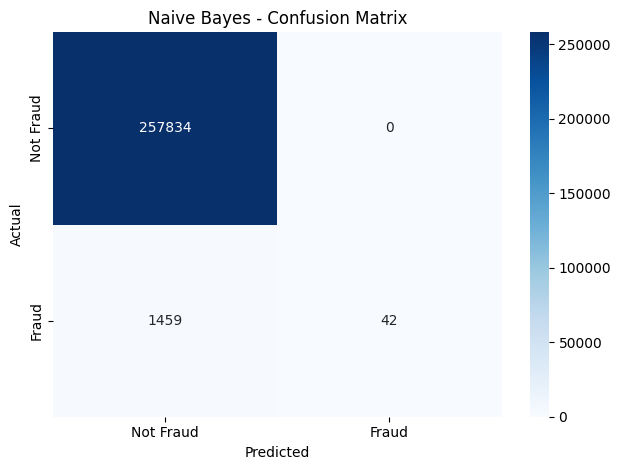

In [27]:
plot_confusion(y_test, y_pred_nb, "Naive Bayes - Confusion Matrix")

Naive Bayes - ROC Curve

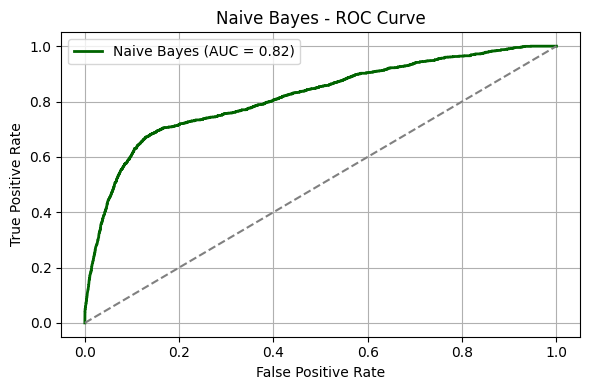

In [24]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The Naive Bayes classifier is an example of how high accuracy can disguise poor performance in imbalanced classification problems. Thought the model has an overall accuracy of 99% and a ROC AUC score of 0.82, a closer look shows that this performance is powered almost entirely by its ability to correctly classify non-fraudulent transactions (which are the majority of the dataset) The model achieves perfect precision for fraud cases but has an extremely low recall of just 2.8%, which means it detects only 42 out of 1,501 actual fraudulent transactions. The confusion matrix confirms this imbalance. Almost all fraud cases go undetected, while all legitimate transactions are confidently labeled as non-fraud. In a fraud detection setting where catching fraud is the most important, this behavior makes the model ineffective. While Naive Bayes is computationally efficient and useful as a baseline, its  assumptions of independence and makes it poorly suited for critical and high stakes applications like financial fraud prediction.